In [2]:
import os
from glob import glob
from pandas import DataFrame
import pandas as pd
import configparser
import subprocess as sp
import matplotlib.pyplot as plt
import pprint

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
bench_start = '2018-11-08_00:12:48'
bench_end = '2018-11-08_02:54:12'

experiments_path = '/home/dongwonshin/Desktop/SLAM_eval/Experiment_Results'
all_benchmarks = sorted(glob('%s/*' % experiments_path))

# benchmark filtereing
filtered_benchmarks = []
for benchmark in all_benchmarks:
    if (bench_start <= benchmark.split('/')[-1] and benchmark.split('/')[-1] <= bench_end):
        filtered_benchmarks.append(benchmark)

df = DataFrame()
for benchmark in filtered_benchmarks:
    config = configparser.ConfigParser()
    config.read(os.path.join(benchmark, 'POI.ini'))
    target_kitti_data = config.get('PARAMETERS','target_kitti_data')
    icp_config = config.get('PARAMETERS','icp_config')
    odom_config = config.get('PARAMETERS','odom_config')

    df = df.append({"benchmark_path": benchmark.split('/')[-1],
                    "target_kitti_data": target_kitti_data, 
                    "icp_config": icp_config, 
                    "odom_config" : odom_config}, ignore_index = True)

for eval_type in ['ape', 'rpe']:
    result_files = ""
    for index, row in df.iterrows():
        result_files += os.path.join('\"%s' % experiments_path ,row['benchmark_path'],'%s_eval/%s_results.zip\"' % (eval_type, eval_type)) + " "
    
    os.system('evo_res %s --save_table %s_table.csv --use_filenames --no_warnings --silent' % (result_files, eval_type))

In [36]:
def constructe_table(table_file, df, target_kitti_data):
    table = pd.read_csv(table_file)
    for idx in range(len(df)):
        table.ix[:,0][idx] = table.ix[:,0][idx].split('/')[-3]

    table.columns = ['benchmark_path', 'max', 'mean', 'median', 'min', 'rmse', 'sse', 'std']
    table = pd.merge(table,df)

    # conditions
    table = table[
        (table['target_kitti_data']==str(target_kitti_data))
        & (table['odom_config']=='with_odom')
#         & (table['icp_config']=='ordinary_icp')
    ]
    return table

def bar_plot(title, table):
    table.ix[:,5].plot(kind = 'bar')
    plt.title(title)
    plt.show()

target_kitti_data : 0
        benchmark_path       rmse    icp_config odom_config
0  2018-11-08_00:12:48  17.413353  semantic_icp   with_odom
2  2018-11-08_00:28:48  17.435372  ordinary_icp   with_odom


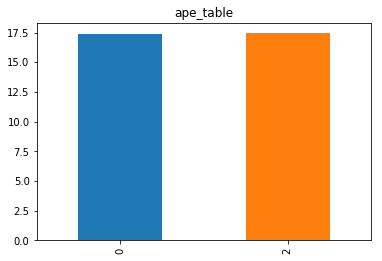

target_kitti_data : 1
        benchmark_path       rmse    icp_config odom_config
4  2018-11-08_00:38:57  39.366305  semantic_icp   with_odom
6  2018-11-08_00:43:13  38.931682  ordinary_icp   with_odom


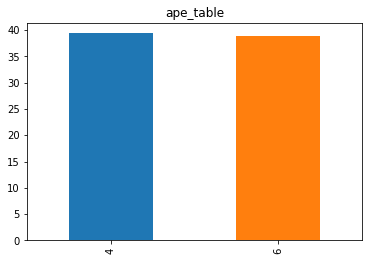

target_kitti_data : 2
         benchmark_path       rmse    icp_config odom_config
8   2018-11-08_00:53:31  23.702939  semantic_icp   with_odom
10  2018-11-08_01:09:58  27.579115  ordinary_icp   with_odom


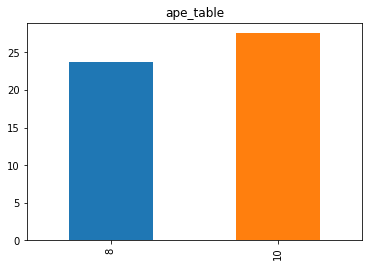

target_kitti_data : 4
         benchmark_path      rmse    icp_config odom_config
12  2018-11-08_01:18:46  1.123017  semantic_icp   with_odom
14  2018-11-08_01:19:55  0.957509  ordinary_icp   with_odom


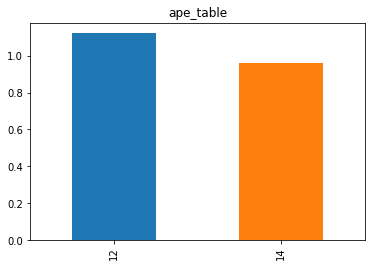

target_kitti_data : 5
         benchmark_path       rmse    icp_config odom_config
16  2018-11-08_01:25:24  12.420614  semantic_icp   with_odom
18  2018-11-08_01:35:13  14.680079  ordinary_icp   with_odom


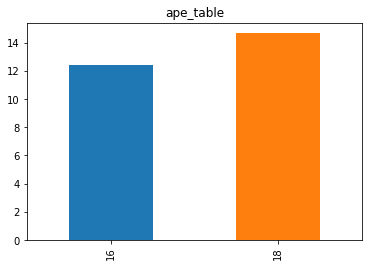

target_kitti_data : 6
         benchmark_path       rmse    icp_config odom_config
20  2018-11-08_01:42:10  20.133251  semantic_icp   with_odom
22  2018-11-08_01:46:11  21.272904  ordinary_icp   with_odom


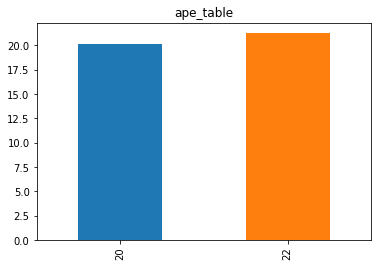

target_kitti_data : 7
         benchmark_path       rmse    icp_config odom_config
24  2018-11-08_01:50:16   9.586948  semantic_icp   with_odom
26  2018-11-08_01:54:34  10.757870  ordinary_icp   with_odom


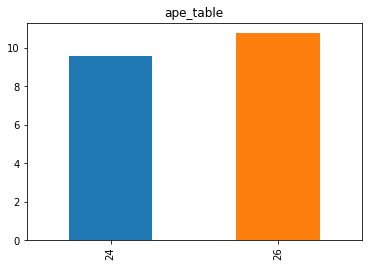

target_kitti_data : 8
         benchmark_path        rmse    icp_config odom_config
28  2018-11-08_02:05:41  109.808404  semantic_icp   with_odom
30  2018-11-08_02:24:02   79.786903  ordinary_icp   with_odom


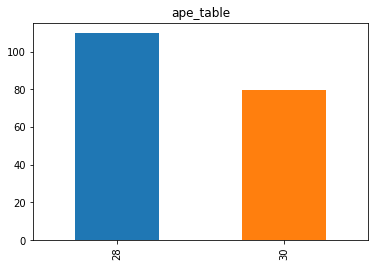

target_kitti_data : 9
         benchmark_path       rmse    icp_config odom_config
32  2018-11-08_02:35:59  22.561621  semantic_icp   with_odom
34  2018-11-08_02:41:44  23.817540  ordinary_icp   with_odom


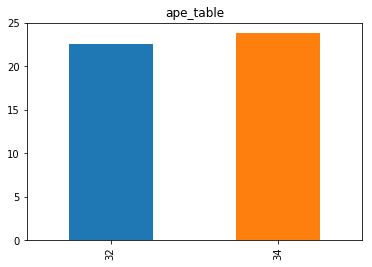

target_kitti_data : 10
         benchmark_path      rmse    icp_config odom_config
36  2018-11-08_02:47:03  10.26317  semantic_icp   with_odom
38  2018-11-08_02:51:44  10.85720  ordinary_icp   with_odom


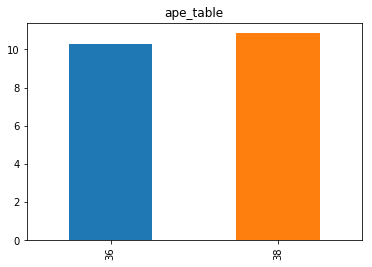

In [37]:
for target_kitti_data in [0,1,2,4,5,6,7,8,9,10]:
    print('target_kitti_data : %d' % target_kitti_data)
    ape_table = constructe_table('ape_table.csv', df, target_kitti_data)
    print(ape_table[['benchmark_path','rmse','icp_config','odom_config']])
    bar_plot('ape_table',ape_table)

target_kitti_data : 0
        benchmark_path      rmse    icp_config   odom_config
2  2018-11-08_00:28:48  1.682077  ordinary_icp     with_odom
3  2018-11-08_00:36:47  1.466155  ordinary_icp  without_odom


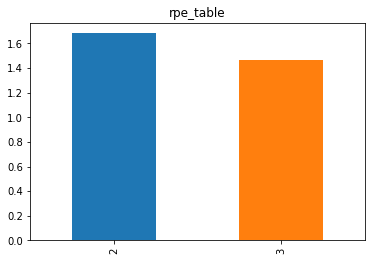

target_kitti_data : 1
        benchmark_path      rmse    icp_config   odom_config
6  2018-11-08_00:43:13  3.656543  ordinary_icp     with_odom
7  2018-11-08_00:45:21  3.389858  ordinary_icp  without_odom


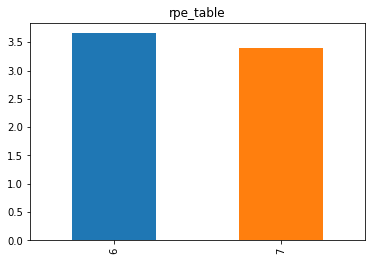

target_kitti_data : 2
         benchmark_path      rmse    icp_config   odom_config
10  2018-11-08_01:09:58  2.087646  ordinary_icp     with_odom
11  2018-11-08_01:18:10  2.059143  ordinary_icp  without_odom


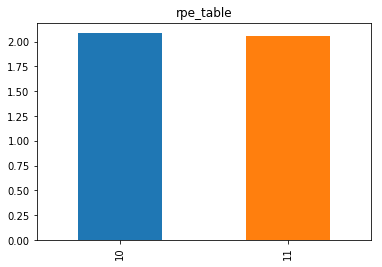

target_kitti_data : 4
         benchmark_path      rmse    icp_config   odom_config
14  2018-11-08_01:19:55  2.810316  ordinary_icp     with_odom
15  2018-11-08_01:20:30  2.510162  ordinary_icp  without_odom


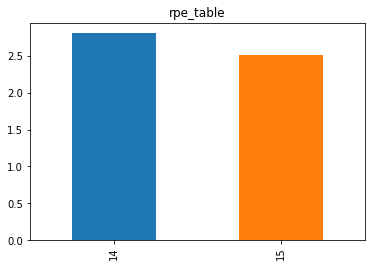

target_kitti_data : 5
         benchmark_path      rmse    icp_config   odom_config
18  2018-11-08_01:35:13  1.486066  ordinary_icp     with_odom
19  2018-11-08_01:40:08  1.337151  ordinary_icp  without_odom


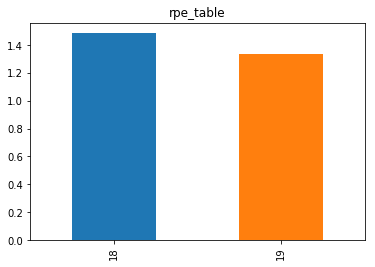

target_kitti_data : 6
         benchmark_path      rmse    icp_config   odom_config
22  2018-11-08_01:46:11  1.979966  ordinary_icp     with_odom
23  2018-11-08_01:48:12  1.853026  ordinary_icp  without_odom


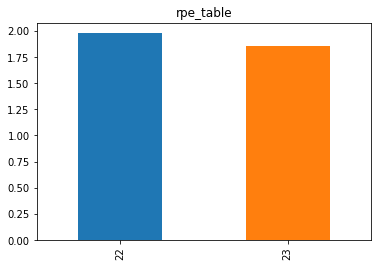

target_kitti_data : 7
         benchmark_path      rmse    icp_config   odom_config
26  2018-11-08_01:54:34  1.232576  ordinary_icp     with_odom
27  2018-11-08_01:56:36  1.097017  ordinary_icp  without_odom


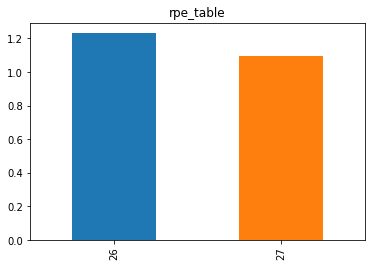

target_kitti_data : 8
         benchmark_path      rmse    icp_config   odom_config
30  2018-11-08_02:24:02  9.640578  ordinary_icp     with_odom
31  2018-11-08_02:33:07  9.080657  ordinary_icp  without_odom


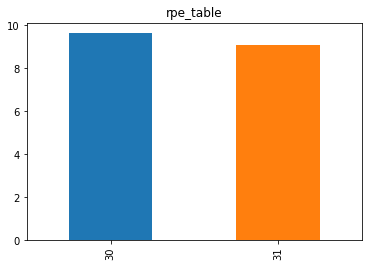

target_kitti_data : 9
         benchmark_path      rmse    icp_config   odom_config
34  2018-11-08_02:41:44  2.009169  ordinary_icp     with_odom
35  2018-11-08_02:44:35  1.668174  ordinary_icp  without_odom


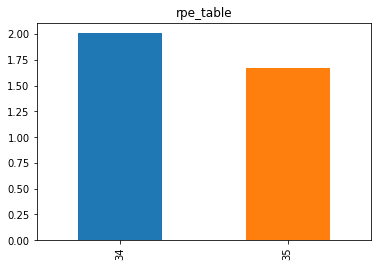

target_kitti_data : 10
         benchmark_path      rmse    icp_config   odom_config
38  2018-11-08_02:51:44  1.528492  ordinary_icp     with_odom
39  2018-11-08_02:54:12  1.528492  ordinary_icp  without_odom


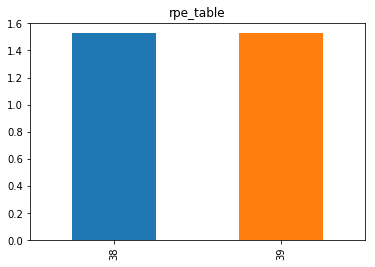

In [35]:
for target_kitti_data in [0,1,2,4,5,6,7,8,9,10]:
    print('target_kitti_data : %d' % target_kitti_data)
    rpe_table = constructe_table('rpe_table.csv', df, target_kitti_data)
    print(rpe_table[['benchmark_path','rmse','icp_config','odom_config']])
    bar_plot('rpe_table',rpe_table)